# CF 4.9 Data Visualisations
## Table of Contents
1. Order_day_of_week bar

2. Prices histogram

3. Prices scatterplot

4. Creating a 70/30 data sample

5. Day of week line chart

6. Hour of day histogram

7. Loyalty bar

8. Hour Prices line

9. Age dependants line chart

10. Age and spending line chart

11. Saving visualisations

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data

In [3]:
path = r"C:\Users\grace\CareerFoundry\CF.mod4 - Python Fundamentals for Data Analysts"

In [4]:
master_df = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'master_dataset.pkl'))

In [26]:
master_df.head(20)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,order_frequency,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-range product,Busy Day,Average orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-range product,Regular Day,Most orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-range product,Busy Day,Most orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Regular Day,Average orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Slow Day,Most orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Busy Day,Average orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Busy Day,Average orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Regular Day,Most orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Busy Day,Most orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,4.3,Low_range_product,Regular Day,Average orders,8,New customer,7.988889,Low spender,30.0,Non-frequent customer


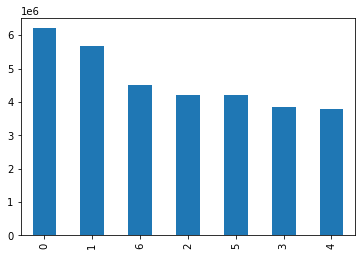

In [6]:
# Creating a bar chart
day_of_week_bar = master_df['orders_day_of_week'].value_counts().plot.bar()

In [ ]:
# Creating a histogram

In [7]:
#Remedial cleaning
master_df.loc[master_df['prices'] > 100, 'prices'] = np.nan

In [8]:
master_df['prices'].max()

25.0

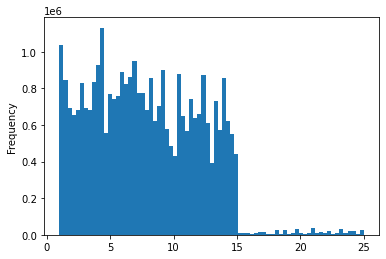

In [9]:
price_hist = master_df['prices'].plot.hist(bins = 75)

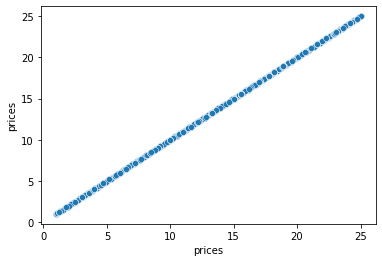

In [10]:
# Creating a scatterplot
prices_scatter = sns.scatterplot(x = 'prices', y = 'prices',data = master_df)

In [11]:
# Creating a sample
np.random.seed(4)
dev = np.random.rand(len(master_df)) <= 0.7

In [12]:
# Checking dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
# Store 70% of the sample to the 'big' dataframe
big = master_df[dev]

In [14]:
small = master_df[~dev]

In [ ]:
# Checking sample sizes

In [15]:
len(master_df)

32406041

In [16]:
len(big) + len(small)

32406041

In [17]:
#Refining df
master_df_2 = small[['orders_day_of_week', 'prices']]

In [18]:
#Checking df
master_df_2

,orders_day_of_week,prices
0,1,9.0
2,1,9.0
3,2,12.6
6,1,12.6
10,3,4.3
...,...,...
32406021,0,7.2
32406027,6,5.8
32406032,1,1.2
32406033,6,3.0


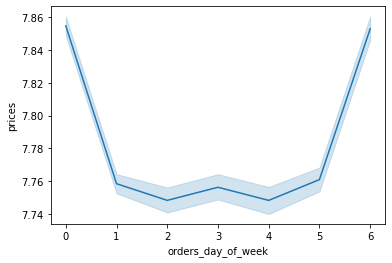

In [19]:
# Creating line chart
weekday_prices_line = sns.lineplot(data = master_df_2, x = 'orders_day_of_week', y = 'prices')

    # Task 3 - Create a histogram of the 'order_hour_of_day' column and describe

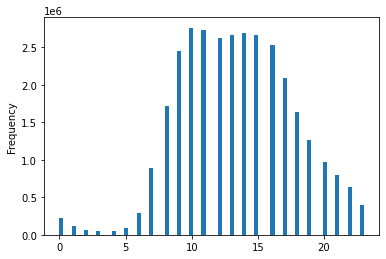

In [20]:
hour_of_day_hist = master_df['order_hour_of_day'].plot.hist(bins = 75)

In [ ]:
# Describe histogram
This histogram puts the hour of the day on the x axis and the frequency of orders on the y axis. 
You can see that there is quite a difference between the min and max order frequency. 
The highest order frequency is between 10am and 4pm. The quietest time is between midnight and 5am

    # Task 4 - Create a bar chart for the 'loyalty flag' column

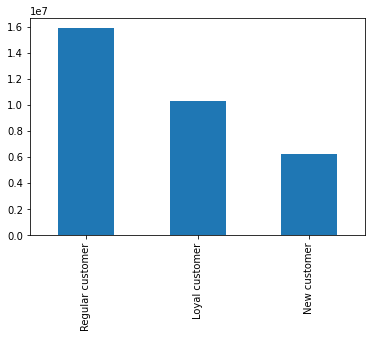

In [21]:
loyalty_bar = master_df['loyalty_flag'].value_counts().plot.bar()

    # Task 5 Investigate expenditure difference in 'prices' column depending on hour of day (use accurate sample)

In [22]:
# Creating df using small sample for viz. (small used to save processing power)
master_df_3 = small[['order_hour_of_day', 'prices']]

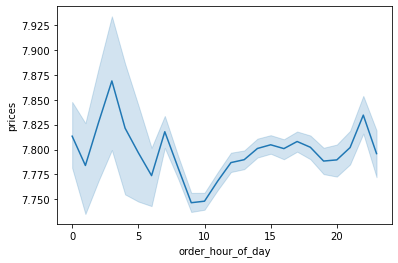

In [23]:
hour_prices_line = sns.lineplot(data = master_df_3, x = 'order_hour_of_day', y = 'prices')

    # Task 6 - Determine whether there is a connection between 'age' and 'marital_status' with a line chart exploring 'age' and  'num_dependants'

In [24]:
# Creating df using small sample for viz. (small used to save processing power)
master_df_4 = small[['age', 'n_dependants']]

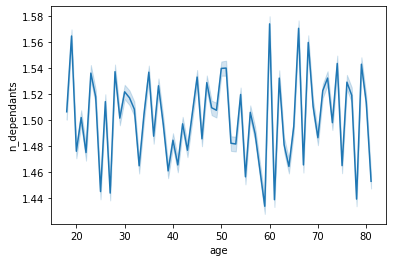

In [25]:
age_dependants_line = sns.lineplot(data = master_df_4, x = 'age', y = 'n_dependants')

In [ ]:
# Describe line chart
This line shows that there customers whos age ranges from 18 - 80. The number of dependents is highly varied across all age
ranges. Ages and number of dependents appear to have no correlation. 

    # Task 7 - Explore connection between age and spending power

In [29]:
# Creating df using small sample for viz. (small used to save processing power)
master_df_5 = small[['age', 'spending' ]]

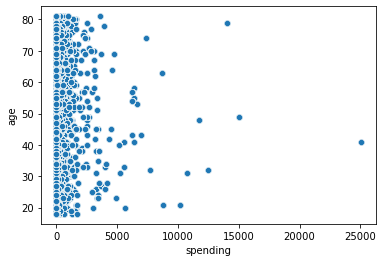

In [31]:
age_spending_scatter = sns.scatterplot(x = 'spending', y = 'age', data = master_df)

In [ ]:
# Describe scatterplot
This plot shows that most spending up to $5 is consistant across all ages. As the price of the product increases 
there are considerably less purchases that are not tied to a specific age group. 

    # Task 8 - Export all visualisations into relivent folder

In [33]:
day_of_week_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'day_of_week_bar_orders.png'))

In [34]:
price_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'price_hist.png'))

In [35]:
prices_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'prices_scatter.png'))

In [36]:
weekday_prices_line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'weekday_prices_line.png'))

In [37]:
hour_of_day_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hour_of_day_hist.png'))

In [38]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_bar.png'))

In [39]:
hour_prices_line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hour_prices_line.png'))

In [40]:
age_dependants_line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_dependants_line.png'))

In [41]:
age_spending_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_spending_scatter.png'))